# **Medical Cost Prediction: Machine Learning Workflow for Regression Tasks**

## Overview
##### This notebook is an step-by-step instruction to train a machine learning model to prediction medical insurance cost based on insrued age, sex, BMI, children, smoking history, and region in the United States. Following topics will be discussed:

##### 1. Python packages requirements
##### 2. Loading data and exploratory data analsys (EDA)
##### 3. Data cleaning and preprocessing
##### 4. Model training and optimization 
##### 5. Model evaluation using key metrics

##### **1. Python packages requirements**

In [38]:
# Loading data
import numpy as np 
import pandas as pd 

# Exploratory data analsys (EDA) 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

# Data cleaning and preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Model training 
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# Model evaluation 
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error

In [39]:
warnings.filterwarnings('ignore')

##### **2. Loading data and exploratory data analsys (EDA)**

In [40]:
df = pd.read_csv("../data/medical_cost_personal_datasets.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


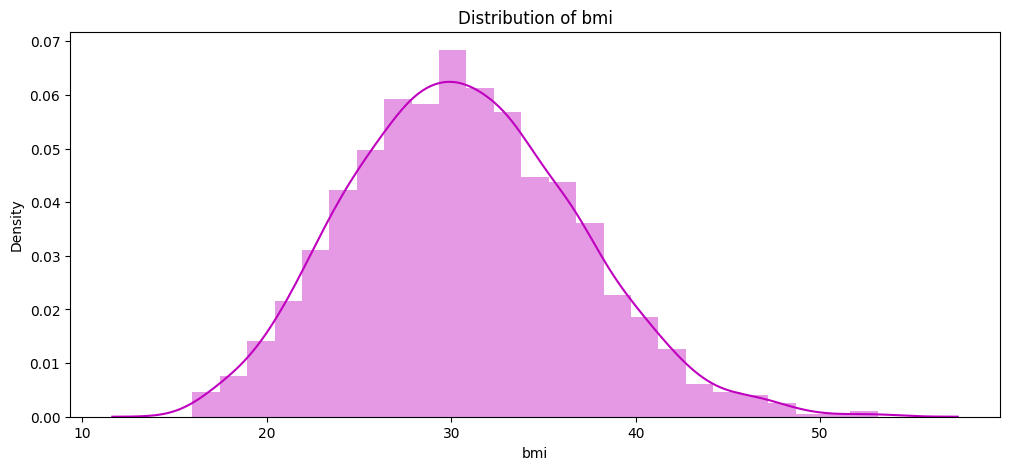

In [43]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

##### **3. Data cleaning and preprocessing**

In [44]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [45]:
# preprocessing for plotting
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [46]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

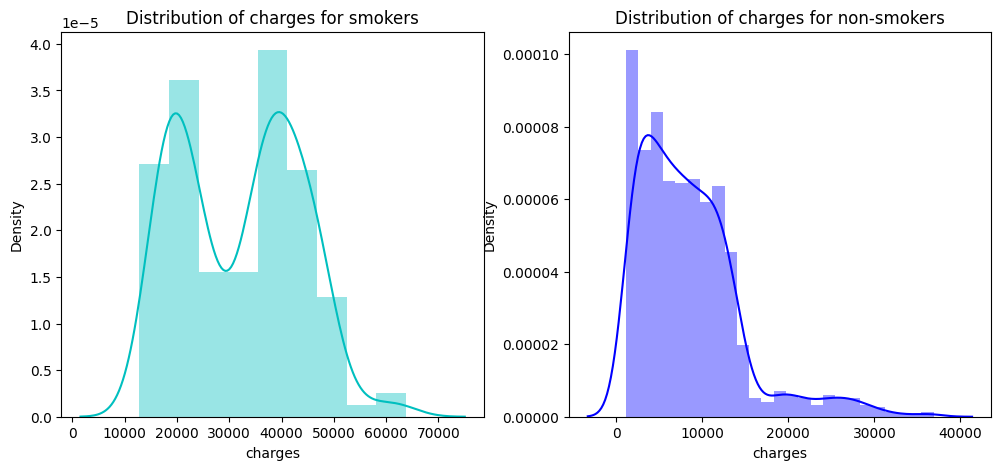

In [47]:
# plotting

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

<Axes: >

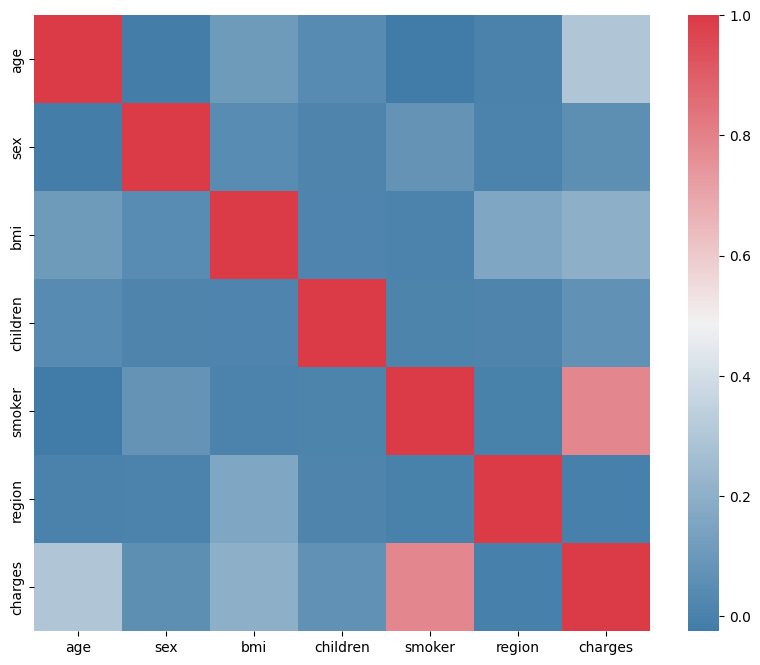

In [48]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

##### **4. Model training and optimization** (gridsearch to be added)

In [49]:
X = df.drop(['charges'], axis = 1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

scoring = {
    'R2': make_scorer(r2_score),
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)


models = {
    'LinearRegression w/ PCA': {
        'model': LinearRegression(),
        'params': {
            'pca__n_components': [0.5, 0.7, 0.9]
        }
    },
    'PLSRegression': {
        'model': PLSRegression(),
        'params': {
            'regressor__n_components': [1, 2, 3, 4, 5, 6]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': [100, 150, 200],
            'regressor__max_depth': [10, 20, 30],
            'regressor__min_samples_split': [2, 3],
            'regressor__min_samples_leaf': [ 2, 3, 4]
        }
    },
    'HistGradientBoosting': {
        'model': HistGradientBoostingRegressor(random_state=42),
        'params': {
            'regressor__learning_rate': [0.1, 0.02, 0.04],
            'regressor__max_iter': [200, 300, 400],
            'regressor__max_depth': [None, 10, 20],
            'regressor__l2_regularization': [0.1, 0.2, 0.5]
        }
    }
}


In [53]:
results = []
best_models = {}

for name, config in models.items():
    print(f"Training {name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('regressor', config['model'])
    ])
    
    grid = GridSearchCV(pipeline,
                        param_grid=config['params'],
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=0)

    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    best_models[name] = best_model
    
     # --- Cross-validated training metrics ---
    train_scores = cross_validate(best_model, X_train, y_train, cv=cv, scoring={
        'R2': 'r2',
        'MAE': 'neg_mean_absolute_error',
        'MSE': 'neg_mean_squared_error'
    })

    # Average cross-validated scores
    r2_train = np.mean(train_scores['test_R2'])
    mae_train = -np.mean(train_scores['test_MAE'])
    mse_train = -np.mean(train_scores['test_MSE'])
    rmse_train = np.sqrt(mse_train)

    # --- Test metrics ---
    y_pred_test = best_model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    # --- Collect results ---
    results.append({
        'Model': name,
        'Best Params': best_params,
        'Train R2': round(r2_train, 4),
        'Train MAE': round(mae_train, 4),
        'Train RMSE': round(rmse_train, 4),
        'Test R2': round(r2_test, 4),
        'Test MAE': round(mae_test, 4),
        'Test RMSE': round(rmse_test, 4)
    })

Training LinearRegression w/ PCA...
Training PLSRegression...
Training RandomForest...
Training HistGradientBoosting...


##### **5. Model evaluation** (code need optimization)

In [54]:
results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
print(results_df.sort_values(by='Test R2', ascending=False).reset_index(drop=True))

                     Model  \
0             RandomForest   
1     HistGradientBoosting   
2  LinearRegression w/ PCA   
3            PLSRegression   

                                                                                                                         Best Params  \
0  {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}   
1    {'regressor__l2_regularization': 0.2, 'regressor__learning_rate': 0.02, 'regressor__max_depth': 10, 'regressor__max_iter': 300}   
2                                                                                                         {'pca__n_components': 0.9}   
3                                                                                                     {'regressor__n_components': 2}   

   Train R2  Train MAE  Train RMSE  Test R2   Test MAE  Test RMSE  
0    0.8163  2902.4212   5099.7784   0.8172  2990.8031  5070.9367  
1    0.8124  3106.9785   5179.73

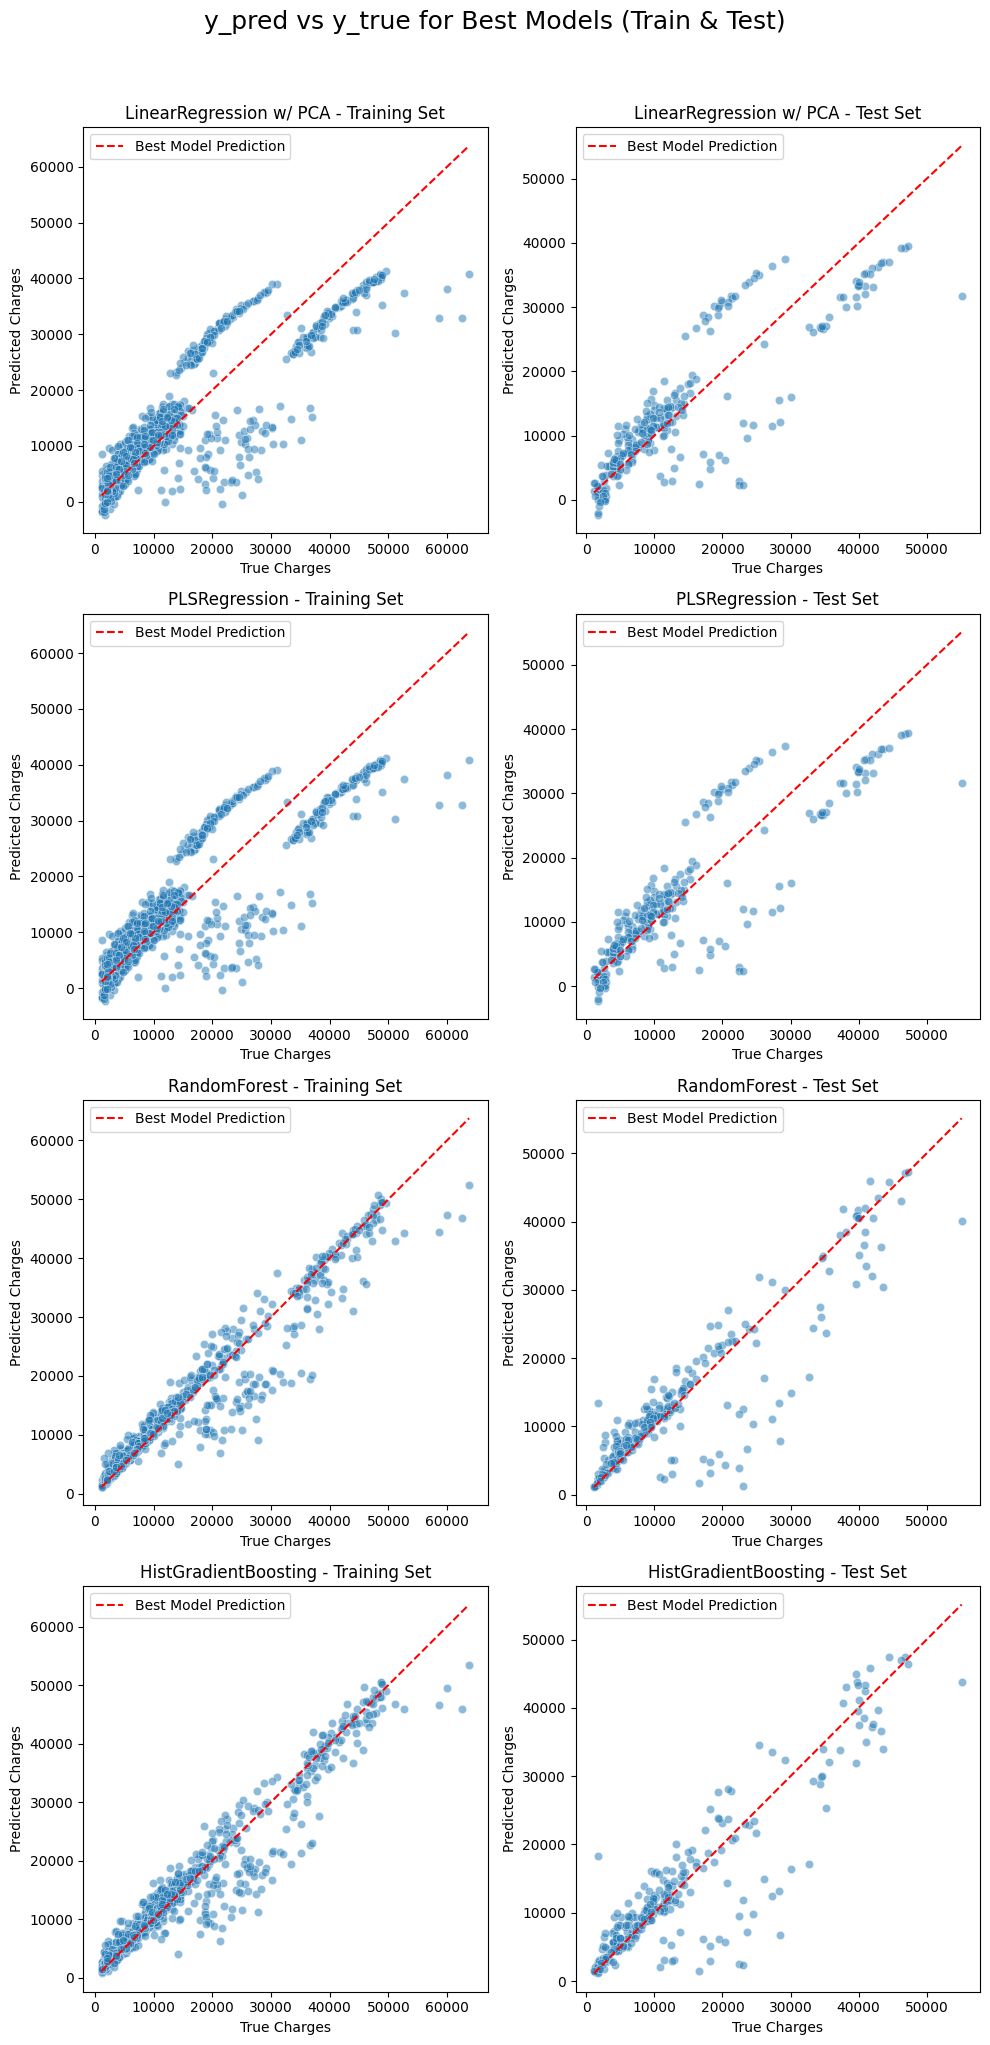

In [56]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

for i, (name, model) in enumerate(best_models.items()):
    # Train predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # --- Training set plot ---
    ax_train = axes[2 * i]
    sns.scatterplot(x=y_train, y=y_pred_train, ax=ax_train, alpha=0.5)
    ax_train.plot([y_train.min(), y_train.max()],
                  [y_train.min(), y_train.max()],
                  'r--', label='Best Model Prediction')
    ax_train.set_title(f'{name} - Training Set')
    ax_train.set_xlabel('True Charges')
    ax_train.set_ylabel('Predicted Charges')
    ax_train.legend()

    # --- Test set plot ---
    ax_test = axes[2 * i + 1]
    sns.scatterplot(x=y_test, y=y_pred_test, ax=ax_test, alpha=0.5)
    ax_test.plot([y_test.min(), y_test.max()],
                 [y_test.min(), y_test.max()],
                 'r--', label='Best Model Prediction')
    ax_test.set_title(f'{name} - Test Set')
    ax_test.set_xlabel('True Charges')
    ax_test.set_ylabel('Predicted Charges')
    ax_test.legend()

plt.suptitle('y_pred vs y_true for Best Models (Train & Test)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()